### Student Information
Name: 陳翼弘

Student ID: 103033617

GitHub ID:22215314

---

### Instructions

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 

In [1]:
# -- set up dataset environment-- #
import os
import os.path
import helpers.data_mining_helpers as dmh
import numpy as np
nas_folder_path = "NAS_NEAF/課程/2021_DataMining/sentiment labelled sentences/sentiment labelled sentences"
file_names = ['amazon_cells_labelled.txt', 'imdb_labelled.txt', 'yelp_labelled.txt']


In [2]:
# -- load dataset -- #
import csv

dataset = []
dataset_data = []
dataset_score = []
dataset_lib = []
dataset_lib_name = []
for index, file_name in enumerate(file_names):
    
    fileID = open(os.path.join(os.path.expanduser('~'), nas_folder_path, file_names[index]))
    dataset_temp = list(csv.reader(fileID, delimiter = "\t"))
    
    fileID.close()    
    
    dataset.extend(dataset_temp)
    dataset_data.extend([i[0] for i in dataset_temp])
    dataset_score.extend([i[1] for i in dataset_temp])
    dataset_lib.extend([int(index) for i in dataset_temp])
    dataset_lib_name.extend([file_name[:-13] for i in dataset_temp])

In [3]:
# -- check the length of the dataset -- #
len(dataset_lib)

3000

In [4]:
# -- show firt # data -- #
dataset[:9]

[['So there is no way for me to plug it in here in the US unless I go by a converter.',
  '0'],
 ['Good case, Excellent value.', '1'],
 ['Great for the jawbone.', '1'],
 ['Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!',
  '0'],
 ['The mic is great.', '1'],
 ['I have to jiggle the plug to get it to line up right to get decent volume.',
  '0'],
 ['If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.',
  '0'],
 ['If you are Razr owner...you must have this!', '1'],
 ['Needless to say, I wasted my money.', '0']]

In [5]:
# -- convert data to pandas -- #
import pandas as pd
DS = pd.DataFrame(dataset, columns=['text', 'score'])
DS['lib_name'] = dataset_lib_name
DS['lib'] = dataset_lib

In [6]:
# -- reordered the data -- #
DS = DS.sample(frac=1).reset_index(drop=True)

In [7]:
DS[0:9]

,text,score,lib_name,lib
0,It is very educational for children 1 to 8 yea...,1,imdb,1
1,Good Service-check!,1,yelp,2
2,I like Steiners because it's dark and it feels...,1,yelp,2
3,It clicks into place in a way that makes you w...,0,amazon_cells,0
4,The story line is totally predictable.,0,imdb,1
5,"In other words, the content level of this film...",1,imdb,1
6,The one down note is the ventilation could use...,0,yelp,2
7,I would recommend purchasing the Jabra JX-10 s...,1,amazon_cells,0
8,"Worst service to boot, but that is the least o...",0,yelp,2


In [8]:
# -- practicing the query techniqu -- #
DS.iloc[::10, 0:2][0:10]

,text,score
0,It is very educational for children 1 to 8 yea...,1
10,The movie had you on the edge of your seat and...,1
20,"After 20 minutes wait, I got a table.",0
30,Today the graphics are crap.,0
40,Avoid at ALL costs!,0
50,Things that went wrong: - They burned the saga...,0
60,"I searched the Internet, and found this one to...",1
70,The last 15 minutes of movie are also not bad ...,1
80,It does everything the description said it would.,1
90,Paolo Sorrentino has written a wonderful story...,1


In [ ]:
DS.loc[::10, 'text'][0:10]

In [ ]:
# -- null value check -- #
DS.isnull()

In [ ]:
DS.isnull().apply(lambda x: dmh.check_missing_values(x))

In [ ]:
DS.isnull().any(axis=1)

In [ ]:
dummy_series = pd.Series(["dummy_record", "1"], index=["text", "score"])

In [ ]:
dummy_series


In [ ]:
result_with_series = DS.append(dummy_series, ignore_index=True)

In [ ]:
result_with_series

In [ ]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

In [ ]:
dummy_dict=[{'text':'dummy_record', 'score':'1'}]

In [ ]:
DS = DS.append(dummy_dict, ignore_index=True)
len(DS)

In [ ]:
DS.isnull().apply(lambda x: dmh.check_missing_values(x))

In [ ]:
DS.dropna(inplace=True)

In [ ]:
DS.isnull().apply(lambda x: dmh.check_missing_values(x))

In [ ]:
len(DS)

In [ ]:
# -- check the duplicated value -- #
sum(DS.duplicated('text'))

In [ ]:
DS.duplicated('text')

In [ ]:
duplicate=DS[DS.duplicated('text')]

In [ ]:
duplicate['text']

In [ ]:
DS.drop_duplicates(keep=False, inplace=True)

In [ ]:
len(DS)

In [ ]:
# -- Data sampling -- #
DS_sample = DS.sample(n=1000)
DS_sample[0:4]

In [ ]:
# -- creating the distribution plot by the lib -- #
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# -- original data plot -- #
print(DS.lib_name.value_counts())
DS.lib_name.value_counts().plot(kind = 'bar',
                                title = 'Library distribution',
                                ylim = [0, 1200],
                                rot = 0, fontsize = 11, figsize = (8,3))

In [ ]:
# -- sampled data plot -- #
print(DS_sample.lib_name.value_counts())

# plot barchart for DS_sample
DS_sample.lib_name.value_counts().plot(kind = 'bar',
                                       title = 'Sample lib distribution',
                                       ylim = [0, 450],
                                       rot = 0, fontsize = 12, figsize = (8,3))

In [ ]:
X = DS_sample.lib_name.value_counts().index

In [ ]:
X_axis = np.arange(len(X))

In [ ]:
plt.bar(X_axis - 0.1, DS.lib_name.value_counts(), 0.2, label='original')
plt.bar(X_axis + 0.1, DS_sample.lib_name.value_counts(), 0.2, label='sampled')

plt.xticks(X_axis, X)
plt.xlabel("Library")
plt.ylabel("Number of data")
plt.title("Number of data in the library")
plt.legend()
plt.show()

In [ ]:
# -- creating freature with nltk -- #
import nltk
nltk.download('punkt')

In [38]:
DS['unigrams'] = DS['text'].apply(lambda x: dmh.tokenize_text(x))

In [39]:
DS[0:4]["unigrams"]

0    [It, is, very, educational, for, children, 1, ...
1                             [Good, Service-check, !]
2    [I, like, Steiners, because, it, 's, dark, and...
3    [It, clicks, into, place, in, a, way, that, ma...
Name: unigrams, dtype: object

In [40]:
DS[0:4]

,text,score,lib_name,lib,unigrams
0,It is very educational for children 1 to 8 yea...,1,imdb,1.0,"[It, is, very, educational, for, children, 1, ..."
1,Good Service-check!,1,yelp,2.0,"[Good, Service-check, !]"
2,I like Steiners because it's dark and it feels...,1,yelp,2.0,"[I, like, Steiners, because, it, 's, dark, and..."
3,It clicks into place in a way that makes you w...,0,amazon_cells,0.0,"[It, clicks, into, place, in, a, way, that, ma..."


In [ ]:
list(DS[0:1]['unigrams'])

In [42]:
# -- counting words frequency -- #
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
DS_counts = count_vect.fit_transform(DS.text)

In [43]:
analyze = count_vect.build_analyzer()

In [44]:
DS_counts.shape

(2968, 5154)

In [45]:
# -- showing result of the partial DS_counts -- #
DS_counts[0:20,0:100].toarray()


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [46]:
# -- count for the specific number of document -- #
numDoc = 20
total_voc_count = sum(DS_counts[0:20]).toarray()

In [47]:
total_voc_count.shape

(1, 5154)

In [48]:
# -- calculate the most counted 50 words -- #
first_num_voc = total_voc_count[0].argsort()[-50:][::-1]

In [49]:
first_num_voc.shape

(50,)

In [50]:
list_num_voc = [count_vect.get_feature_names()[i] for i in first_num_voc[:] ]

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [51]:
plot_x = ["term_" + str(i) for i in list_num_voc]
plot_y = ["doc_" + str(i) for i in list(DS.index)[0:20]]
plot_z = DS_counts[0:20, first_num_voc[:]].toarray()

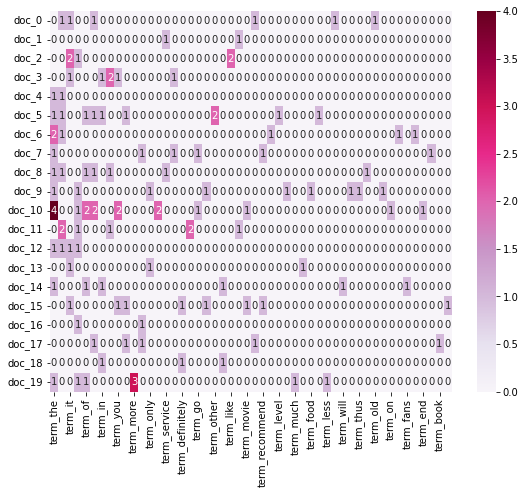

In [52]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=4, annot=True)

In [53]:
# -- reduced dimension with PCA -- #
from sklearn.decomposition import PCA

In [54]:
DS_reduced = PCA(n_components=2).fit_transform(DS_counts.toarray())

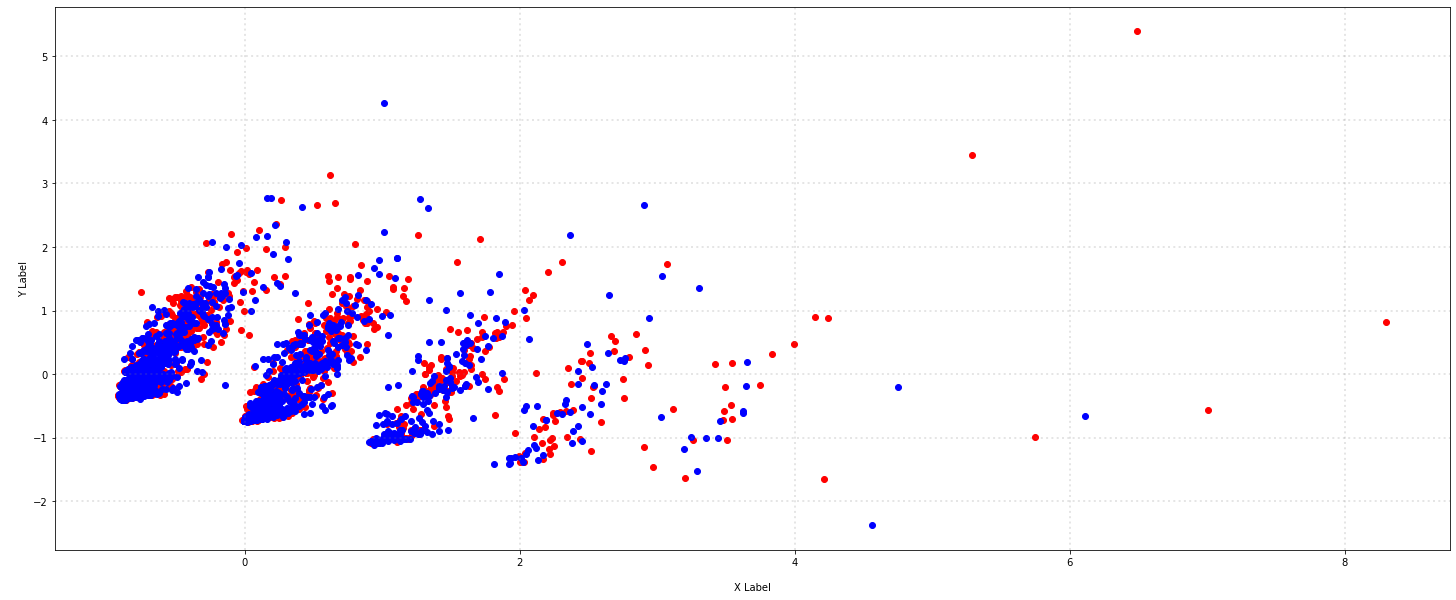

In [55]:
# -- plot the result of PCV -- #
col = ['r', 'b']

categories = ['1', '0']
fig = plt.figure(figsize = (25, 10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = DS_reduced[DS['score'] == category].T[0]
    ys = DS_reduced[DS['score'] == category].T[1]
    
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

In [56]:
# -- calculate the frequencies of the words -- #
term_frequencies = sum(DS_counts).toarray()[0]

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


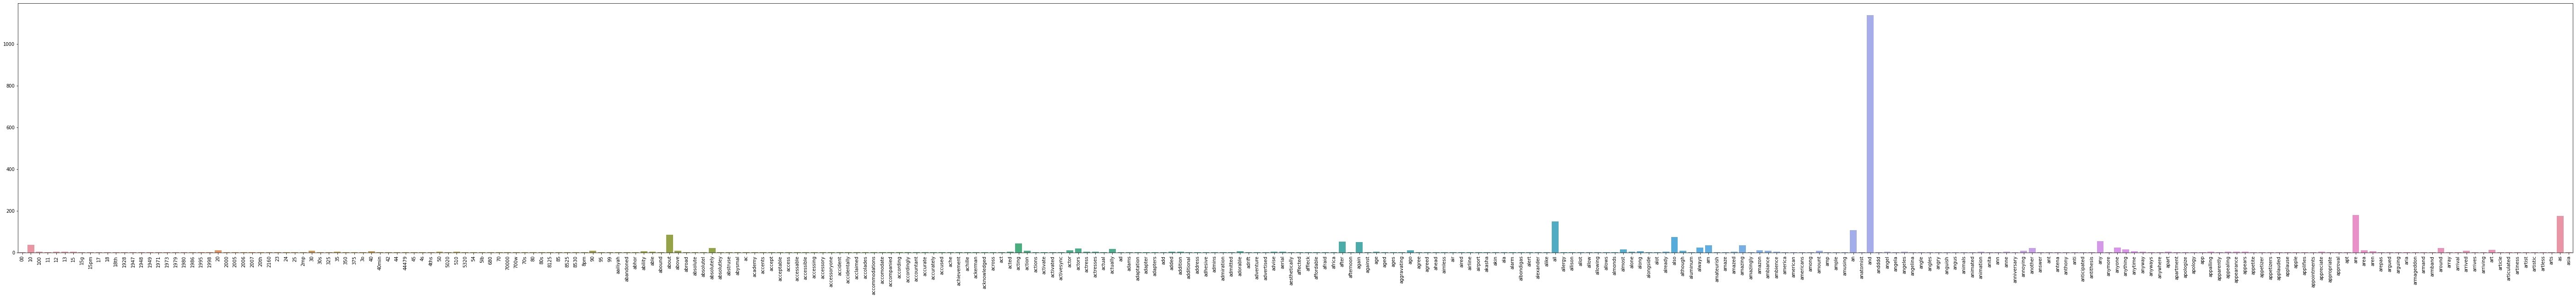

In [57]:
plt.subplots(figsize=(100, 10))
bar = sns.barplot(x=count_vect.get_feature_names()[:300],
                 y=term_frequencies[:300])
bar.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [58]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


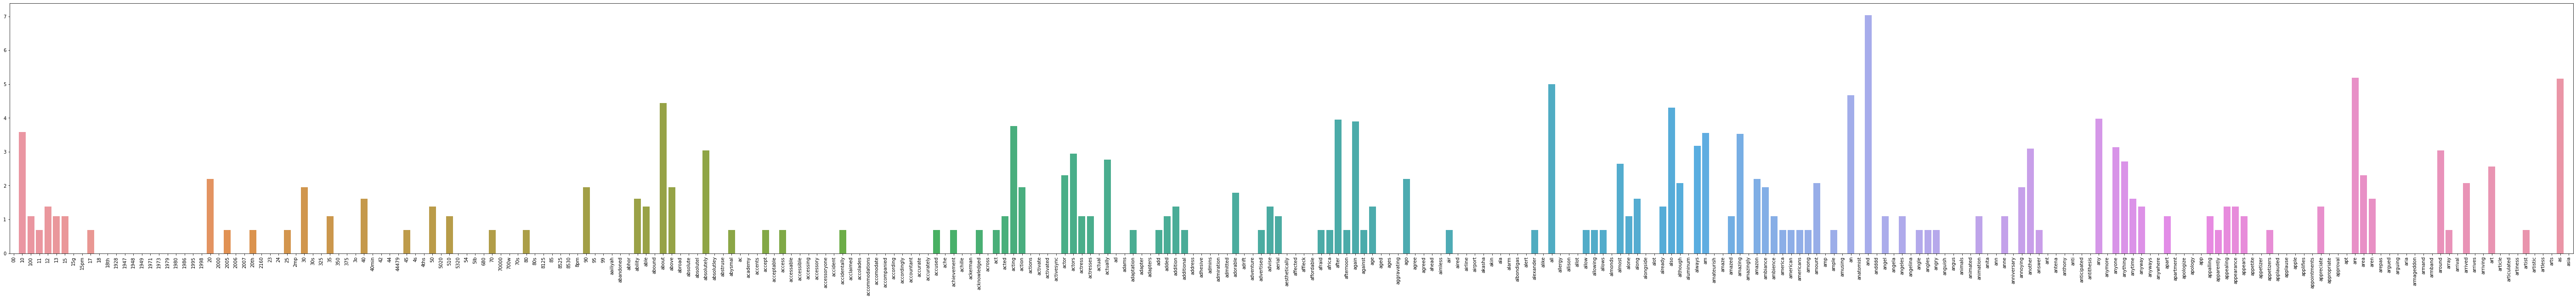

In [59]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [60]:
# -- binarize the dataset by the library -- #
from sklearn import preprocessing , metrics, decomposition, pipeline, dummy

In [61]:
mlb = preprocessing.LabelBinarizer()

In [62]:
mlb.fit(DS.lib)

LabelBinarizer()

In [63]:
mlb.classes_

array([0., 1., 2.])

In [64]:
DS['bin_category'] = mlb.transform(DS['lib']).tolist()

In [65]:
DS[0:9]

,text,score,lib_name,lib,unigrams,bin_category
0,It is very educational for children 1 to 8 yea...,1,imdb,1.0,"[It, is, very, educational, for, children, 1, ...","[0, 1, 0]"
1,Good Service-check!,1,yelp,2.0,"[Good, Service-check, !]","[0, 0, 1]"
2,I like Steiners because it's dark and it feels...,1,yelp,2.0,"[I, like, Steiners, because, it, 's, dark, and...","[0, 0, 1]"
3,It clicks into place in a way that makes you w...,0,amazon_cells,0.0,"[It, clicks, into, place, in, a, way, that, ma...","[1, 0, 0]"
4,The story line is totally predictable.,0,imdb,1.0,"[The, story, line, is, totally, predictable, .]","[0, 1, 0]"
5,"In other words, the content level of this film...",1,imdb,1.0,"[In, other, words, ,, the, content, level, of,...","[0, 1, 0]"
6,The one down note is the ventilation could use...,0,yelp,2.0,"[The, one, down, note, is, the, ventilation, c...","[0, 0, 1]"
7,I would recommend purchasing the Jabra JX-10 s...,1,amazon_cells,0.0,"[I, would, recommend, purchasing, the, Jabra, ...","[1, 0, 0]"
8,"Worst service to boot, but that is the least o...",0,yelp,2.0,"[Worst, service, to, boot, ,, but, that, is, t...","[0, 0, 1]"


In [66]:
# -- calculation of cosine simularity -- #
doc_to_transform_1 = []
random_record_1 = DS.iloc[50]
random_record_1 = random_record_1['text']
doc_to_transform_1.append(random_record_1)

doc_to_transform_2 = []
random_record_2 = DS.iloc[100]
random_record_2 = random_record_2['text']
doc_to_transform_2.append(random_record_2)

doc_to_transform_3 = []
random_record_3 = DS.iloc[150]
random_record_3 = random_record_3['text']
doc_to_transform_3.append(random_record_3)

In [67]:
print(doc_to_transform_1)
print(doc_to_transform_2)
print(doc_to_transform_3)

['Things that went wrong: - They burned the saganaki.']
["I ordered the Voodoo pasta and it was the first time I'd had really excellent pasta since going gluten free several years ago."]
['What a big waste of time.']


In [68]:
from sklearn.preprocessing import binarize

In [69]:
doc_vect_count_1 = count_vect.transform(doc_to_transform_1)
doc_vect_count_2 = count_vect.transform(doc_to_transform_2)
doc_vect_count_3 = count_vect.transform(doc_to_transform_3)

In [70]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(doc_vect_count_1, doc_vect_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(doc_vect_count_1, doc_vect_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(doc_vect_count_1, doc_vect_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(doc_vect_count_2, doc_vect_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.141421
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


# TF-ID Feature

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
TFIDF = vectorizer.fit_transform(DS.text)

In [72]:
TFIDF.shape

(2968, 5154)

In [73]:
# -- appling naive bayes classification -- #
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split

In [74]:
# -- split data into train data and testing data (TFIDF) -- #
X_train, X_test, Y_train, Y_test = train_test_split(TFIDF, DS.score, test_size=0.25)

In [75]:
bnb = BernoulliNB(binarize = 0.0)
bnb.fit(X_train, Y_train)
bnb.score(X_test, Y_test)

0.839622641509434

In [76]:
# -- split data into train data and testing data (term frequency) -- #
X_train, X_test, Y_train, Y_test = train_test_split(DS_counts, DS.score, test_size=0.25)

In [77]:
bnb = BernoulliNB(binarize = 0.0)
bnb.fit(X_train, Y_train)
bnb.score(X_test, Y_test)

0.8328840970350404

If we analysis from the result, the two different feature extraction method shows quiet the same accuarcy by using the naive basye method.

If we take a look at the TF-IDF feature. It is express by the possibility instead of the counting of the quentity. The advantage of TF-IDF is that it consider the frequency of the words using in how much documents. This means that if the word is more frequntly used in the data base, the effectness of the word will be considered smaller. The strategy of TF-IDF might work when the documents are full of the preposition or other grammer based words. 

However, the most sentence in the dataset today are relatively shorts. Some of them even are not a compelete sentences. So the TF-IDF feaetures are not better in this dataset.